# Pog 4 - A Stack of Stacks (of Stacks?)

## Data Creation

In [1]:
import pandas as pd
import numpy as np

from data import POG4_Dataset

In [2]:
data = POG4_Dataset()

INFO - Creating XML data
INFO - Creating activity data
INFO - Missing days: 35
INFO - Featurizing time series data
INFO - Creating interactions...
INFO - Dropped null columns: ['RunningSpeed', 'RunningSpeed_hrs_btween', 'AppleWalkingSteadiness', 'AppleWalkingSteadiness_hrs_btween', 'LowHeartRateEvent', 'LowHeartRateEvent_hrs_btween', 'RunningGroundContactTime', 'RunningGroundContactTime_hrs_btween', 'DistanceCycling', 'DistanceCycling_hrs_btween', 'HandwashingEvent', 'HandwashingEvent_hrs_btween', 'NumberOfTimesFallen', 'NumberOfTimesFallen_hrs_btween', 'MindfulSession', 'MindfulSession_hrs_btween', 'SixMinuteWalkTestDistance', 'SixMinuteWalkTestDistance_hrs_btween', 'HKDataTypeSleepDurationGoal', 'HKDataTypeSleepDurationGoal_hrs_btween', 'Height', 'Height_hrs_btween', 'RunningStrideLength', 'RunningStrideLength_hrs_btween', 'HeartRateRecoveryOneMinute', 'HeartRateRecoveryOneMinute_hrs_btween', 'SwimmingStrokeCount', 'SwimmingStrokeCount_hrs_btween', 'DietaryEnergyConsumed', 'DietaryEn

In [3]:
data.train.head()

,date,sleep_hours,workout_duration,workout_totalDistance,workout_totalDistanceUnit,workout_totalEnergyBurned,workout_totalEnergyBurnedUnit,WalkingSpeed,WalkingSpeed_hrs_btween,ActiveEnergyBurned,...,max_endDate_min_hr,min_endDate_min_hr,avg_startDate_max_sin,avg_startDate_max_cos,avg_startDate_min_sin,avg_startDate_min_cos,avg_endDate_max_sin,avg_endDate_max_cos,avg_endDate_min_sin,avg_endDate_min_cos
0,2018-01-01,7.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,23.0,-0.500000,0.866025,NaN,NaN,-0.258819,0.965926,-0.258819,0.965926
1,2018-01-02,7.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,9.0,-0.258819,0.965926,NaN,NaN,-0.258819,0.965926,-0.866025,-0.500000
2,2018-01-03,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,8.0,-0.342020,0.939693,NaN,NaN,-0.258819,0.965926,-0.819152,-0.573576
3,2018-01-04,8.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,7.0,-0.642788,0.766044,NaN,NaN,-0.258819,0.965926,-0.737277,-0.675590
4,2018-01-05,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,8.0,-0.258819,0.965926,NaN,NaN,-0.258819,0.965926,-0.819152,-0.573576


## Simple Models - Variance Control

In [4]:
class SuperSimpleModel:
    def __init__(self, value):
        self.value = value
        
    def predict(self, X):
        return np.ones(len(X)) * self.value

In [5]:
median = data.train["sleep_hours"].median()
print(f"Median sleep hours: {median}")

sub_median = data.create_submission(SuperSimpleModel(median))
sub_median.head()
sub_median.to_csv("./submissions/sub_median.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Median sleep hours: 6.666666666666667


In [6]:
mean = data.train["sleep_hours"].mean()
print(f"Mean sleep hours: {mean}")

sub_mean = data.create_submission(SuperSimpleModel(mean))
sub_mean.head()
sub_mean.to_csv("./submissions/sub_mean.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


Mean sleep hours: 6.658339177185602


In [7]:
class SimpleModel:
    def __init__(self, value_group, group):
        self.value_group = value_group
        self.group = group
        
    def predict(self, X):
        return X[self.group].map(self.value_group)

In [8]:
median_dow = data.train.groupby("day_of_week")["sleep_hours"].median()
print(median_dow)

sub_median_dow = data.create_submission(SimpleModel(median_dow, "day_of_week"))
sub_median_dow.head()
sub_median_dow.to_csv("./submissions/sub_median_dow.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week
0    6.500000
1    6.475000
2    6.537500
3    6.766667
4    6.658333
5    6.908333
6    6.800000
Name: sleep_hours, dtype: float64


In [9]:
mean_dow = data.train.groupby("day_of_week")["sleep_hours"].mean()
print(mean_dow)

sub_mean_dow = data.create_submission(SimpleModel(mean_dow, "day_of_week"))
sub_mean_dow.head()
sub_mean_dow.to_csv("./submissions/sub_mean_dow.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week
0    6.463259
1    6.427655
2    6.565453
3    6.731240
4    6.632178
5    6.940122
6    6.848071
Name: sleep_hours, dtype: float64


In [10]:
median_workday = data.train.groupby("is_workday")["sleep_hours"].median()
print(median_workday)

sub_median_workday = data.create_submission(SimpleModel(median_workday, "is_workday"))
sub_median_workday.head()
sub_median_workday.to_csv("./submissions/sub_median_workday.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


is_workday
0    6.862500
1    6.583333
Name: sleep_hours, dtype: float64


In [11]:
mean_workday = data.train.groupby("is_workday")["sleep_hours"].mean()
print(mean_workday)

sub_mean_workday = data.create_submission(SimpleModel(mean_workday, "is_workday"))
sub_mean_workday.head()
sub_mean_workday.to_csv("./submissions/sub_mean_workday.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


is_workday
0    6.894322
1    6.563761
Name: sleep_hours, dtype: float64


In [12]:
class DoubleGroupModel:
    def __init__(self, value_group, group):
        self.value_group = value_group
        self.group = group
        
    def predict(self, X):
        return X[self.group].apply(lambda x: self.value_group[tuple(x)], axis=1)

In [13]:
median_dow_workday = data.train.groupby(["day_of_week", "is_workday"])["sleep_hours"].median()
print(median_dow_workday)

sub_median_dow_workday = data.create_submission(DoubleGroupModel(median_dow_workday, ["day_of_week", "is_workday"]))
sub_median_dow_workday.head()
sub_median_dow_workday.to_csv("./submissions/sub_median_dow_workday.csv", index=False)

INFO - Creating submission dataset


day_of_week  is_workday
0            1             6.500000
1            1             6.475000
2            1             6.537500
3            1             6.766667
4            1             6.658333
5            0             6.908333
6            0             6.800000
Name: sleep_hours, dtype: float64


INFO - Featurizing time series data
INFO - Creating interactions...


In [14]:
mean_dow_workday = data.train.groupby(["day_of_week", "is_workday"])["sleep_hours"].mean()
print(mean_dow_workday)

sub_mean_dow_workday = data.create_submission(DoubleGroupModel(mean_dow_workday, ["day_of_week", "is_workday"]))
sub_mean_dow_workday.head()
sub_mean_dow_workday.to_csv("./submissions/sub_mean_dow_workday.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


day_of_week  is_workday
0            1             6.463259
1            1             6.427655
2            1             6.565453
3            1             6.731240
4            1             6.632178
5            0             6.940122
6            0             6.848071
Name: sleep_hours, dtype: float64


## Big-boy Models - Bias Control

In [15]:
# Now that simple model mappings are create we can split training data and preprocess (impute & scale)
data.train_test_split()
data.preprocess_data()

INFO - Splitting data into train and test set
INFO - Scaling and imputing data


### Prophet by Facebook

In [16]:
%%capture
!pip install prophet

In [17]:
import json

with open("prophet_best_params.json", "r") as f:
    prophet_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", prophet_best_params)

Best Parameters for XGBoost:  {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


In [18]:
df_p = data.train.copy()
df_p = df_p.fillna(method="ffill").fillna(method="bfill").fillna(0) #Ok for Time Series
df_p = df_p.rename(columns={'date': 'ds', 'sleep_hours': 'y'})
df_p.head()

,ds,y,workout_duration,workout_totalDistance,workout_totalDistanceUnit,workout_totalEnergyBurned,workout_totalEnergyBurnedUnit,WalkingSpeed,WalkingSpeed_hrs_btween,ActiveEnergyBurned,...,max_endDate_min_hr,min_endDate_min_hr,avg_startDate_max_sin,avg_startDate_max_cos,avg_startDate_min_sin,avg_startDate_min_cos,avg_endDate_max_sin,avg_endDate_max_cos,avg_endDate_min_sin,avg_endDate_min_cos
0,2018-01-01,7.300000,44.016667,0.0,0.0,0.0,0.0,2.34878,13.186944,432.95,...,23.0,23.0,-0.500000,0.866025,-0.965926,-0.258819,-0.258819,0.965926,-0.258819,0.965926
1,2018-01-02,7.516667,44.016667,0.0,0.0,0.0,0.0,2.34878,13.186944,432.95,...,23.0,9.0,-0.258819,0.965926,-0.965926,-0.258819,-0.258819,0.965926,-0.866025,-0.500000
2,2018-01-03,6.000000,44.016667,0.0,0.0,0.0,0.0,2.34878,13.186944,432.95,...,23.0,8.0,-0.342020,0.939693,-0.965926,-0.258819,-0.258819,0.965926,-0.819152,-0.573576
3,2018-01-04,8.250000,44.016667,0.0,0.0,0.0,0.0,2.34878,13.186944,432.95,...,23.0,7.0,-0.642788,0.766044,-0.965926,-0.258819,-0.258819,0.965926,-0.737277,-0.675590
4,2018-01-05,7.400000,44.016667,0.0,0.0,0.0,0.0,2.34878,13.186944,432.95,...,23.0,8.0,-0.258819,0.965926,-0.965926,-0.258819,-0.258819,0.965926,-0.819152,-0.573576


In [19]:
import itertools

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

m = Prophet()

# Add the additional regressors
for col in [col for col in df_p.columns if col not in ["ds", "y"]]:
    m.add_regressor(col)

m = Prophet(**prophet_best_params).fit(df_p)  # Fit model with best params

INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG - input tempfile: /tmp/tmpu6qmp321/umcri81d.json
DEBUG - input tempfile: /tmp/tmpu6qmp321/7ax2pv_f.json
DEBUG - idx 0
DEBUG - running CmdStan, num_threads: None
DEBUG - CmdStan args: ['/home/sebastian/mambaforge/envs/pog4-sleep/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34006', 'data', 'file=/tmp/tmpu6qmp321/umcri81d.json', 'init=/tmp/tmpu6qmp321/7ax2pv_f.json', 'output', 'file=/tmp/tmpu6qmp321/prophet_model_c4ckekw/prophet_model-20230325225223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:52:23 - cmdstanpy - INFO - Chain [1] start processing
INFO - Chain [1] start processing
22:52:23 - cmdstanpy - INFO - Chain [1] done processing
INFO - Chain [1] done processing


In [20]:
class ProphetModel:
    def __init__(self, model):
        self.model = model
        
    def predict(self, X):
        X = X.fillna(method="ffill").fillna(0)
        X = X.rename(columns={'date': 'ds'})
        return self.model.predict(df_p)["yhat"]

sub_prophet = data.create_submission(ProphetModel(m))
sub_prophet.head()
sub_prophet.to_csv("./submissions/sub_prophet.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


### GRU (and his minions)

In [21]:
import json

with open("gru_best_params.json", "r") as f:
    gru_best_params = json.load(f)
    
print("Best Parameters for GRU: ", gru_best_params)

Best Parameters for GRU:  {'lookback': 7, 'criterion': 'mse', 'optimizer': 'sgd', 'batch_size': 47, 'num_epochs': 300, 'num_layers': 3, 'hidden_size': 220, 'dropout_rate': 0.5422813636546171, 'learning_rate': 0.008052612105109524, 'activation_function': 'relu'}


In [22]:
from gru import TimeSeriesDataset, GRUModel, GRUTrainer

import torch
import torch.nn as nn
from torch.optim import Adam, SGD, RMSprop, AdamW
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [23]:
y_train_scaled, y_test_scaled = data.scale_target()

y_train_scaled = pd.DataFrame(y_train_scaled, columns=["sleep_hours"])
y_test_scaled = pd.DataFrame(y_test_scaled, columns=["sleep_hours"])

train = pd.concat([data.X_train, y_train_scaled], axis=1)
test = pd.concat([data.X_test, y_test_scaled], axis=1)

train = pd.concat([train, test], axis=0).to_numpy() # Training on entire dataset since tuned hyperparameters

input_size = train.shape[1] # Number of features (plus 1 for the target)
output_size = 1 # Number of targets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # CUDA support

INFO - Scaling target variable with minmax


In [24]:
# Feature Config
lookback= gru_best_params["lookback"] # Lookback window size
batch_size = gru_best_params["batch_size"]

train_ds = TimeSeriesDataset(train, lookback, output_size)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [25]:
# Model Config
hidden_size= gru_best_params["hidden_size"]
num_layers= gru_best_params["num_layers"]
learning_rate = gru_best_params["learning_rate"]
dropout_rate = gru_best_params["dropout_rate"]
activation_function = gru_best_params["activation_function"]

gru = GRUModel(device, input_size, hidden_size, num_layers, output_size, dropout_rate, activation_function).to(device)

In [26]:
# Training Config
criterion = gru_best_params["criterion"]
optimizer = gru_best_params["optimizer"]
num_epochs = gru_best_params["num_epochs"]

target_scaler = data.target_scaler # Inverse scaling is used to calculate validation RMSE

gru_trainer = GRUTrainer(gru, device, learning_rate, criterion, optimizer, target_scaler)

In [27]:
for epoch in range(num_epochs):
    train_loss = gru_trainer.train(train_dl)
    val_loss = gru_trainer.evaluate(train_dl)
    print(f"Epoch {epoch+1}/{num_epochs}, train_{criterion}: {train_loss:.4f}, valid_rmse: {val_loss:.4f}")

Epoch 1/300, train_mse: 0.2914, valid_rmse: 4.3744
Epoch 2/300, train_mse: 0.2472, valid_rmse: 3.7021
Epoch 3/300, train_mse: 0.2327, valid_rmse: 3.5432
Epoch 4/300, train_mse: 0.2193, valid_rmse: 3.3729
Epoch 5/300, train_mse: 0.2088, valid_rmse: 3.2905
Epoch 6/300, train_mse: 0.1855, valid_rmse: 3.2379
Epoch 7/300, train_mse: 0.1814, valid_rmse: 3.2396
Epoch 8/300, train_mse: 0.1687, valid_rmse: 3.2092
Epoch 9/300, train_mse: 0.1461, valid_rmse: 2.8818
Epoch 10/300, train_mse: 0.1113, valid_rmse: 2.0365
Epoch 11/300, train_mse: 0.0628, valid_rmse: 1.4297
Epoch 12/300, train_mse: 0.0326, valid_rmse: 1.1293
Epoch 13/300, train_mse: 0.0203, valid_rmse: 0.9947
Epoch 14/300, train_mse: 0.0164, valid_rmse: 0.9607
Epoch 15/300, train_mse: 0.0145, valid_rmse: 0.9165
Epoch 16/300, train_mse: 0.0139, valid_rmse: 0.9117
Epoch 17/300, train_mse: 0.0136, valid_rmse: 0.9112
Epoch 18/300, train_mse: 0.0135, valid_rmse: 0.9024
Epoch 19/300, train_mse: 0.0134, valid_rmse: 0.9013
Epoch 20/300, train_m

In [28]:
class NN_Output:
    def __init__(self, model, lookback, target_scaler):
        self.model = model
        self.lookback = lookback
        self.target_scaler = target_scaler
        
    def predict(self, X):
        num_predictions = X.shape[0]
        X = torch.from_numpy(X.to_numpy()).float()
        y_pred = self.model.predict(X, self.lookback, 1, num_predictions)
        y_pred = self.target_scaler.inverse_transform(y_pred)
        
        return y_pred
    

In [29]:
sub_gru = data.create_submission(NN_Output(gru_trainer, lookback, target_scaler))
sub_gru.head()
sub_gru.to_csv("./submissions/sub_gru.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


### LSTM

In [30]:
import json

with open("lstm_best_params.json", "r") as f:
    lstm_best_params = json.load(f)
    
print("Best Parameters for LSTM: ", lstm_best_params)

Best Parameters for LSTM:  {'lookback': 5, 'criterion': 'mae', 'optimizer': 'adam', 'batch_size': 57, 'num_epochs': 300, 'num_layers': 4, 'hidden_size': 53, 'dropout_rate': 0.573910052437709, 'learning_rate': 0.0028844062595003396, 'activation_function': 'linear'}


In [31]:
from lstm import TimeSeriesDataset, LSTMModel, LSTMTrainer

In [32]:
# Feature Config
lookback= lstm_best_params["lookback"]
batch_size = lstm_best_params["batch_size"]

train_ds = TimeSeriesDataset(train, lookback, output_size)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [33]:
# Model Config
hidden_size= lstm_best_params["hidden_size"]
num_layers= lstm_best_params["num_layers"]
learning_rate = lstm_best_params["learning_rate"]
dropout_rate = lstm_best_params["dropout_rate"]
activation_function = lstm_best_params["activation_function"]

lstm = LSTMModel(device, input_size, hidden_size, num_layers, output_size, dropout_rate, activation_function).to(device)

In [34]:
# Training Config
criterion = lstm_best_params["criterion"]
optimizer = lstm_best_params["optimizer"]
num_epochs = lstm_best_params["num_epochs"]

target_scaler = data.target_scaler # Inverse scaling is used to calculate validation RMSE

lstm_trainer = LSTMTrainer(lstm, device, learning_rate, criterion, optimizer, target_scaler)

In [35]:
for epoch in range(num_epochs):
    train_loss = lstm_trainer.train(train_dl)
    val_loss = lstm_trainer.evaluate(train_dl)
    print(f"Epoch {epoch+1}/{num_epochs}, train_{criterion}: {train_loss:.4f}, valid_rmse: {val_loss:.4f}")

Epoch 1/300, train_mae: 0.5817, valid_rmse: 2.2630
Epoch 2/300, train_mae: 0.3445, valid_rmse: 1.7596
Epoch 3/300, train_mae: 0.2201, valid_rmse: 1.2833
Epoch 4/300, train_mae: 0.1705, valid_rmse: 0.9778
Epoch 5/300, train_mae: 0.1321, valid_rmse: 1.0112
Epoch 6/300, train_mae: 0.1138, valid_rmse: 0.9728
Epoch 7/300, train_mae: 0.1063, valid_rmse: 0.9159
Epoch 8/300, train_mae: 0.0966, valid_rmse: 0.9294
Epoch 9/300, train_mae: 0.0932, valid_rmse: 0.9183
Epoch 10/300, train_mae: 0.0927, valid_rmse: 0.9236
Epoch 11/300, train_mae: 0.0932, valid_rmse: 0.9388
Epoch 12/300, train_mae: 0.0907, valid_rmse: 0.9191
Epoch 13/300, train_mae: 0.0914, valid_rmse: 0.9386
Epoch 14/300, train_mae: 0.0903, valid_rmse: 0.9277
Epoch 15/300, train_mae: 0.0907, valid_rmse: 0.9126
Epoch 16/300, train_mae: 0.0903, valid_rmse: 0.9166
Epoch 17/300, train_mae: 0.0903, valid_rmse: 0.9043
Epoch 18/300, train_mae: 0.0916, valid_rmse: 0.9247
Epoch 19/300, train_mae: 0.0889, valid_rmse: 0.8992
Epoch 20/300, train_m

In [36]:
sub_lstm = data.create_submission(NN_Output(lstm_trainer, lookback, target_scaler))
sub_lstm.head()
sub_lstm.to_csv("./submissions/sub_lstm.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


### XGBoost (for Bojan)

In [37]:
# Add Lags and Re-Split/Preprocess
# data.create_lags() #! Need to figure out lags for submissions - iterate through predictions?
# data.train_test_split()
# data.preprocess_data()

In [38]:
data.X_train.head()

,workout_duration,workout_totalDistance,workout_totalDistanceUnit,workout_totalEnergyBurned,workout_totalEnergyBurnedUnit,WalkingSpeed,WalkingSpeed_hrs_btween,ActiveEnergyBurned,ActiveEnergyBurned_hrs_btween,EnvironmentalAudioExposure,...,max_endDate_min_hr,min_endDate_min_hr,avg_startDate_max_sin,avg_startDate_max_cos,avg_startDate_min_sin,avg_startDate_min_cos,avg_endDate_max_sin,avg_endDate_max_cos,avg_endDate_min_sin,avg_endDate_min_cos
0,-0.147155,0.0,0.0,0.0,0.0,-0.00416,-0.067077,-0.084499,-0.04824,0.043047,...,0.320153,2.216751,0.462430,0.609177,0.085493,-0.160981,0.594582,0.485643,0.814391,2.045233
1,-0.147155,0.0,0.0,0.0,0.0,-0.00416,-0.067077,-0.084499,-0.04824,0.043047,...,0.320153,-0.039040,1.413567,0.929512,0.085493,-0.160981,0.594582,0.485643,-0.610536,-0.358068
2,-0.147155,0.0,0.0,0.0,0.0,-0.00416,-0.067077,-0.084499,-0.04824,0.043047,...,0.320153,-0.200168,1.085450,0.845394,0.085493,-0.160981,0.594582,0.485643,-0.500538,-0.478692
3,-0.147155,0.0,0.0,0.0,0.0,-0.00416,-0.067077,-0.084499,-0.04824,0.043047,...,0.320153,-0.361296,-0.100676,0.288583,0.085493,-0.160981,0.594582,0.485643,-0.308403,-0.645938
4,-0.147155,0.0,0.0,0.0,0.0,-0.00416,-0.067077,-0.084499,-0.04824,0.043047,...,0.320153,-0.200168,1.413567,0.929512,0.085493,-0.160981,0.594582,0.485643,-0.500538,-0.478692


In [39]:
import json

with open("xgb_best_params.json", "r") as f:
    xgb_best_params = json.load(f)
    
print("Best Parameters for XGBoost: ", xgb_best_params)

Best Parameters for XGBoost:  {'max_depth': 2, 'subsample': 0.9216745665393588, 'n_estimators': 815, 'learning_rate': 0.00814656376107916, 'colsample_bytree': 0.3863066096959391}


In [40]:
from xgboost import XGBRegressor

xgb = XGBRegressor(tree_method='gpu_hist', gpu_id=0, **xgb_best_params)
xgb.fit(data.X_train, data.y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3863066096959391, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.00814656376107916,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=815, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
sub_xgb = data.create_submission(xgb)
sub_xgb.head()
sub_xgb.to_csv("./submissions/sub_xgb.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


In [42]:
data.X_train

,workout_duration,workout_totalDistance,workout_totalDistanceUnit,workout_totalEnergyBurned,workout_totalEnergyBurnedUnit,WalkingSpeed,WalkingSpeed_hrs_btween,ActiveEnergyBurned,ActiveEnergyBurned_hrs_btween,EnvironmentalAudioExposure,...,max_endDate_min_hr,min_endDate_min_hr,avg_startDate_max_sin,avg_startDate_max_cos,avg_startDate_min_sin,avg_startDate_min_cos,avg_endDate_max_sin,avg_endDate_max_cos,avg_endDate_min_sin,avg_endDate_min_cos
0,-0.147155,0.0,0.0,0.0,0.0,-0.004160,-0.067077,-0.084499,-0.048240,0.043047,...,0.320153,2.216751,0.462430,0.609177,0.085493,-0.160981,0.594582,0.485643,0.814391,2.045233
1,-0.147155,0.0,0.0,0.0,0.0,-0.004160,-0.067077,-0.084499,-0.048240,0.043047,...,0.320153,-0.039040,1.413567,0.929512,0.085493,-0.160981,0.594582,0.485643,-0.610536,-0.358068
2,-0.147155,0.0,0.0,0.0,0.0,-0.004160,-0.067077,-0.084499,-0.048240,0.043047,...,0.320153,-0.200168,1.085450,0.845394,0.085493,-0.160981,0.594582,0.485643,-0.500538,-0.478692
3,-0.147155,0.0,0.0,0.0,0.0,-0.004160,-0.067077,-0.084499,-0.048240,0.043047,...,0.320153,-0.361296,-0.100676,0.288583,0.085493,-0.160981,0.594582,0.485643,-0.308403,-0.645938
4,-0.147155,0.0,0.0,0.0,0.0,-0.004160,-0.067077,-0.084499,-0.048240,0.043047,...,0.320153,-0.200168,1.413567,0.929512,0.085493,-0.160981,0.594582,0.485643,-0.500538,-0.478692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.446287,0.0,0.0,0.0,0.0,-0.704801,3.984289,-0.058111,-0.049794,1.341001,...,-3.363973,-1.328064,-0.354330,0.099597,-0.571240,-1.210928,-2.016951,-1.693756,0.942444,-1.143227
1164,-0.516842,0.0,0.0,0.0,0.0,0.068239,-1.371648,-0.385829,-0.049818,0.172583,...,-2.442941,-1.328064,-0.236709,0.191359,-1.949830,0.285044,-2.156461,-1.960647,-0.086665,-0.794232
1165,-0.124716,0.0,0.0,0.0,0.0,1.204997,-1.501726,0.439862,-0.049834,3.736427,...,0.320153,-1.328064,-0.257498,0.175686,-0.512726,-1.234804,-1.908663,-1.509302,0.730060,-1.104953
1166,0.300367,0.0,0.0,0.0,0.0,0.195940,0.282324,0.221168,-0.048168,-3.569810,...,-1.521910,-1.328064,-0.844775,-0.386312,-1.545529,-0.400072,-2.235242,-2.129844,0.034138,-0.860466


### Extra Trees

In [43]:
with open("et_best_params.json", "r") as f:
    et_best_params = json.load(f)
    
print("Best Parameters for ExtraTrees: ", et_best_params)

Best Parameters for ExtraTrees:  {'bootstrap': True, 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 1807, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [44]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(**et_best_params)
et.fit(data.X_train, data.y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=12, max_features='log2',
                    min_samples_leaf=3, n_estimators=1807)

In [45]:
sub_et = data.create_submission(et)
sub_et.head()
sub_et.to_csv("./submissions/sub_et.csv", index=False)

INFO - Creating submission dataset
INFO - Featurizing time series data
INFO - Creating interactions...


# Stacks on Stacks

In [46]:
# Average all submissions
def average_prediction(dfs):
    for idx, df in enumerate(dfs):
        df["source"] = idx

    dfs = pd.concat(dfs)
    avg_df = dfs.groupby("date")["sleep_hours"].mean().reset_index()
    return avg_df
                                       
simple_weight = 0.25
complex_weight = 1.0 - simple_weight

sub_dfs_simple = [sub_median, sub_mean, sub_median_dow, sub_mean_dow, sub_median_workday, sub_mean_workday, sub_median_dow_workday, sub_mean_dow_workday]
sub_dfs_complex = [sub_prophet, sub_lstm, sub_gru, sub_xgb, sub_et]

# Calculate the average prediction for each list of DataFrames
avg_simple = average_prediction(sub_dfs_simple)
avg_simple.to_csv("./submissions/submission_avg_simple.csv", index=False)

avg_complex = average_prediction(sub_dfs_complex)
avg_complex.to_csv("./submissions/submission_avg_complex.csv", index=False)

stacks_on_stacks = avg_simple.merge(avg_complex, on="date", suffixes=("_simple", "_complex"))

# Calculate the weighted average
stacks_on_stacks["sleep_hours"] = simple_weight * stacks_on_stacks["sleep_hours_simple"] + complex_weight * stacks_on_stacks["sleep_hours_complex"]
stacks_on_stacks = stacks_on_stacks[["date", "sleep_hours"]]
stacks_on_stacks.head()

,date,sleep_hours
0,2022-01-01,6.721079
1,2022-01-02,6.737797
2,2022-01-03,6.604860
3,2022-01-04,6.612264
4,2022-01-05,6.578893


<Axes: >

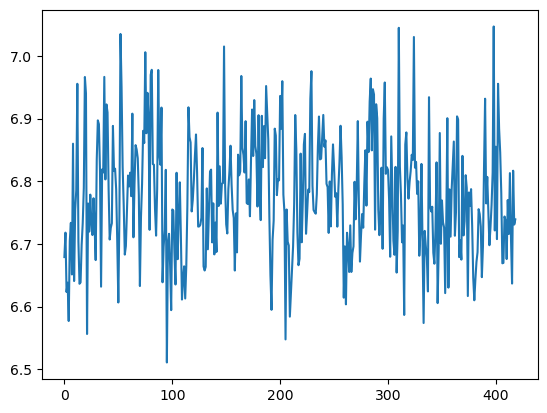

In [47]:
avg_complex.sleep_hours.plot()

<Axes: >

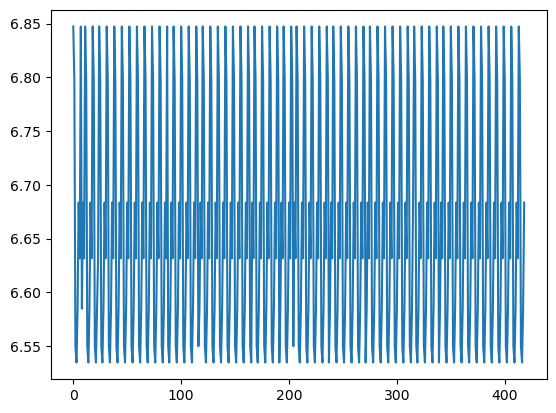

In [48]:
avg_simple.sleep_hours.plot()

<Axes: >

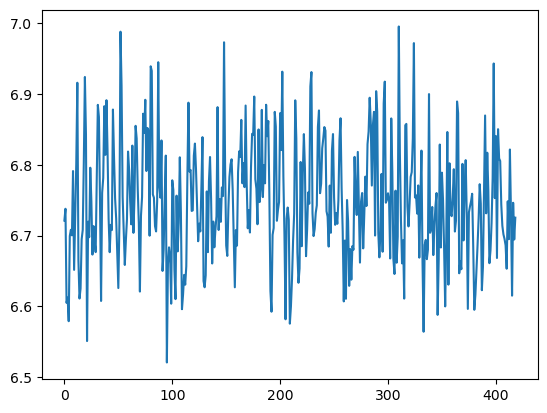

In [49]:
stacks_on_stacks.sleep_hours.plot()

In [50]:
stacks_on_stacks.to_csv("submission_combined.csv", index=False)
#kaggle competitions submit -c kaggle-pog-series-s01e04 -f submission_combined.csv -m "Model Stacking v3"